# Extract Data


In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline



In [2]:
# create dataframe
beer_df = pd.read_csv("https://query.data.world/s/nuub3qupegsd33g3nimifjpajqeq2o")

# for local drive use
#beer_df = pd.read_csv("data/beer.gz")


In [3]:
# drop all rows with any NaN values
beer_df = beer_df.dropna()


In [4]:
# remove duplicate rows in place
beer_df.drop_duplicates(keep="first")
beer_df = beer_df.reset_index(drop = True)


# convert date from unix integer to datetime
beer_df["review_time"] = pd.to_datetime(beer_df["review_time"], unit = "s")

beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518478 entries, 0 to 1518477
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   brewery_id          1518478 non-null  int64         
 1   brewery_name        1518478 non-null  object        
 2   review_time         1518478 non-null  datetime64[ns]
 3   review_overall      1518478 non-null  float64       
 4   review_aroma        1518478 non-null  float64       
 5   review_appearance   1518478 non-null  float64       
 6   review_profilename  1518478 non-null  object        
 7   beer_style          1518478 non-null  object        
 8   review_palate       1518478 non-null  float64       
 9   review_taste        1518478 non-null  float64       
 10  beer_name           1518478 non-null  object        
 11  beer_abv            1518478 non-null  float64       
 12  beer_beerid         1518478 non-null  int64         
dtypes: datetime6

In [5]:
# save to csv file for local use
beer_data = beer_df.to_csv("data/beer.gz", header = True, compression="gzip", index = False)


# Exploratory analysis

In [6]:
# inspect number of rows and columns 
beer_df.shape


(1518478, 13)

In [7]:
# check additional information about dataframe ie spread of data types, null values, total number of records
beer_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518478 entries, 0 to 1518477
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   brewery_id          1518478 non-null  int64         
 1   brewery_name        1518478 non-null  object        
 2   review_time         1518478 non-null  datetime64[ns]
 3   review_overall      1518478 non-null  float64       
 4   review_aroma        1518478 non-null  float64       
 5   review_appearance   1518478 non-null  float64       
 6   review_profilename  1518478 non-null  object        
 7   beer_style          1518478 non-null  object        
 8   review_palate       1518478 non-null  float64       
 9   review_taste        1518478 non-null  float64       
 10  beer_name           1518478 non-null  object        
 11  beer_abv            1518478 non-null  float64       
 12  beer_beerid         1518478 non-null  int64         
dtypes: datetime6

In [8]:
# inspect basic statistic details (all parameters)
beer_df.describe(include="all").T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
brewery_id,1.51848e+06,NaN,NaN,NaN,NaT,NaT,3074.31,5544.34,1,141,417,2298,28003
brewery_name,1518478,5155,Boston Beer Company (Samuel Adams),38806,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_time,1518478,1510459,2004-11-30 00:00:00,20,1996-08-22 00:00:01,2012-01-11 12:35:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_overall,1.51848e+06,NaN,NaN,NaN,NaT,NaT,3.82394,0.717266,0,3.5,4,4.5,5
review_aroma,1.51848e+06,NaN,NaN,NaN,NaT,NaT,3.74622,0.695344,1,3.5,4,4,5
review_appearance,1.51848e+06,NaN,NaN,NaN,NaT,NaT,3.85038,0.614311,0,3.5,4,4,5
review_profilename,1518478,32908,northyorksammy,5346,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beer_style,1518478,104,American IPA,113144,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_palate,1.51848e+06,NaN,NaN,NaN,NaT,NaT,3.75373,0.679335,1,3.5,4,4,5
review_taste,1.51848e+06,NaN,NaN,NaN,NaT,NaT,3.80408,0.728608,1,3.5,4,4.5,5


From above, we have zero values for **review_overall** and **review_appearance** that requires further investigation.  The maximum **beer_abv** is 57.7 which seems extremely high for an alcohol content and will also need to be looked at further. 

In [9]:
# filter for review_overall greater than zero and confirm results
beer_df = beer_df[beer_df["review_overall"] >0]
beer_df.describe().T


,count,mean,std,min,25%,50%,75%,max
brewery_id,1518471.0,3074.313773,5544.350357,1.00,141.0,417.0,2298.0,28003.0
review_overall,1518471.0,3.823955,0.717221,1.00,3.5,4.0,4.5,5.0
review_aroma,1518471.0,3.746223,0.695339,1.00,3.5,4.0,4.0,5.0
review_appearance,1518471.0,3.850401,0.614256,1.00,3.5,4.0,4.0,5.0
review_palate,1518471.0,3.753740,0.679331,1.00,3.5,4.0,4.0,5.0
review_taste,1518471.0,3.804090,0.728600,1.00,3.5,4.0,4.5,5.0
beer_abv,1518471.0,7.042502,2.322564,0.01,5.2,6.5,8.5,57.7
beer_beerid,1518471.0,21405.836113,21780.346701,5.00,1654.0,12830.0,39236.0,77316.0


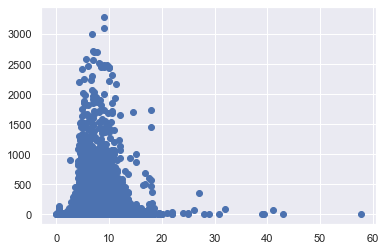

In [10]:
# check abv values with scatterplot
abv_check = beer_df.groupby(["beer_abv", "beer_name"]).size().reset_index(name="counts")
plt.scatter(abv_check["beer_abv"], abv_check["counts"]);
plt.show()


In [11]:
# slice dataframe to validate beers with values >=20% abv
new_abv_check = abv_check.loc[abv_check["beer_abv"] >= 20].sort_values(
    "beer_abv", ascending = False)
new_abv_check


,beer_abv,beer_name,counts
47368,57.70,Schorschbräu Schorschbock 57%,1
47367,43.00,Schorschbräu Schorschbock 43%,2
47366,41.00,Sink The Bismarck!,76
47365,39.44,Schorschbräu Schorschbock 40%,3
47364,39.00,Black Damnation VI - Messy,7
47363,32.00,Tactical Nuclear Penguin,88
47362,30.86,Schorschbräu Schorschbock 31%,1
47361,29.00,Dave,16
47360,28.00,Ghost Deer,3
47359,27.00,Samuel Adams Utopias,355


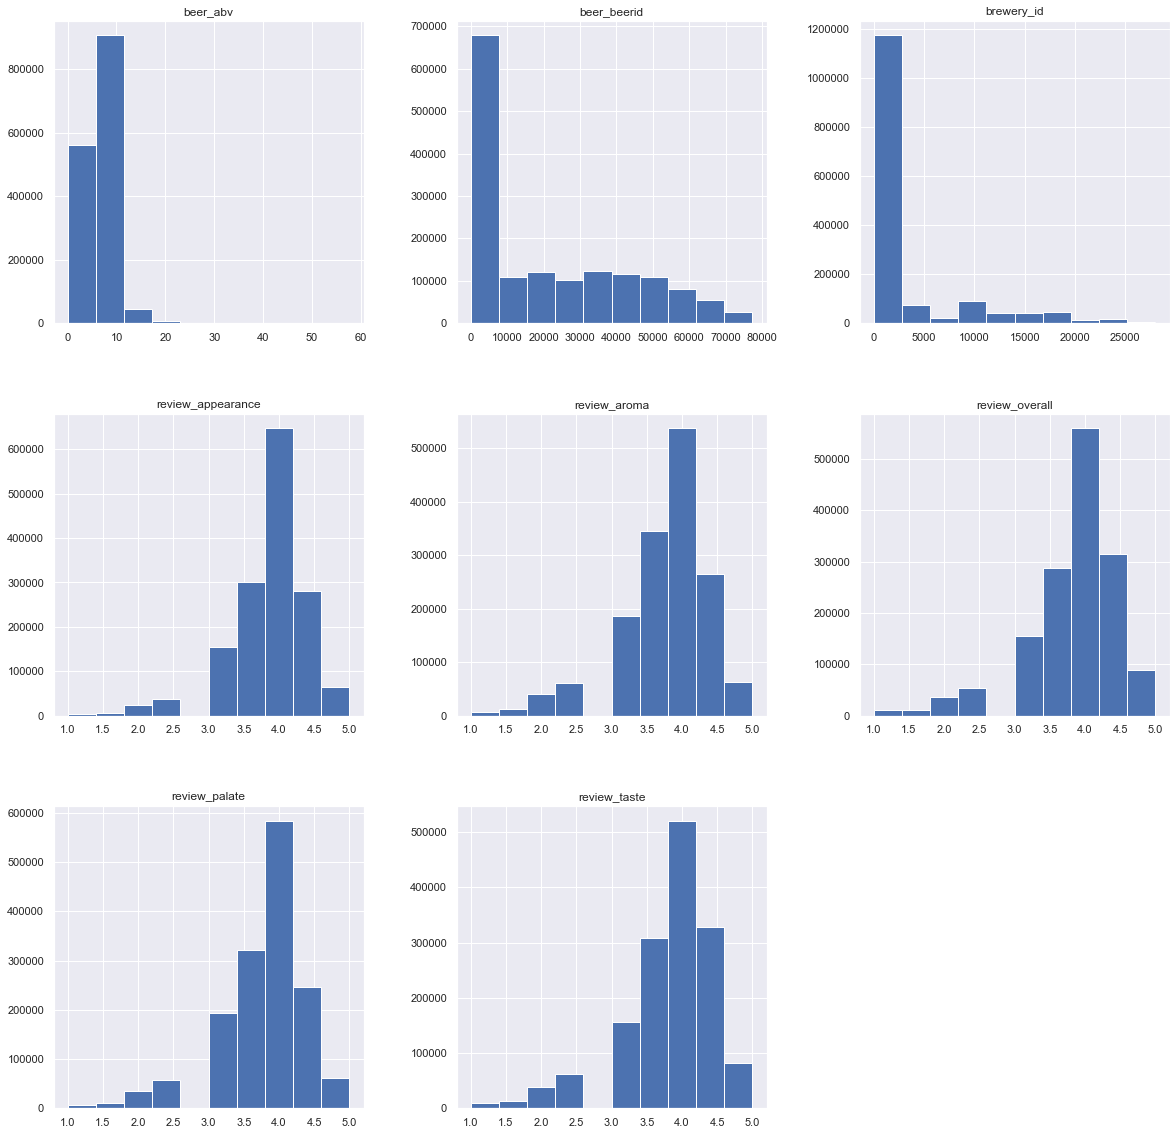

In [12]:
# inspect distribution of dataframe numeric columns
beer_df.hist(figsize = (20,20));


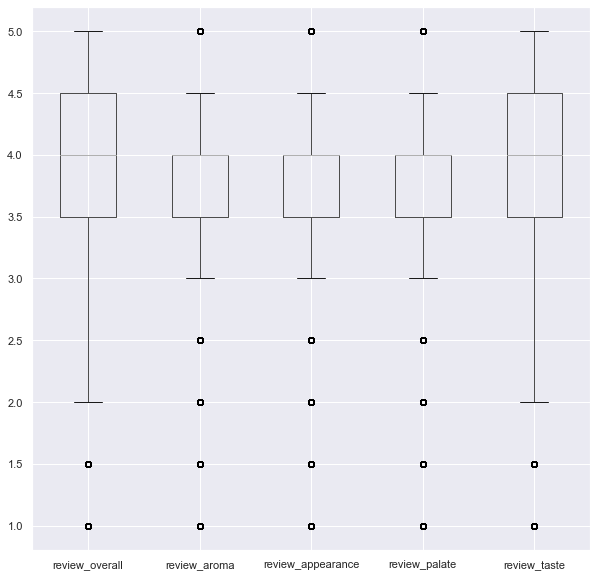

In [13]:
# visualise check of review scores to identify outliers
beer_df.boxplot(column=["review_overall","review_aroma", "review_appearance","review_palate", "review_taste"],
                figsize = (10,10), return_type="axes");


In [14]:
# check for large number of same reviewers ie reviewer bias
total_reviews = beer_df["review_profilename"].count()
reviewers = beer_df.groupby("review_profilename").size().reset_index(name="counts")
reviewers = reviewers.sort_values(by = "counts", ascending = False)

weighting = round(reviewers["counts"]/total_reviews * 100,2)
weighted_reviewers = pd.concat([reviewers, weighting], axis = 1)
weighted_reviewers.columns = ["review_profilename","ratings","% total"]
weighted_reviewers.head(15)


,review_profilename,ratings,% total
26540,northyorksammy,5346,0.35
25335,mikesgroove,4283,0.28
2308,BuckeyeNation,4246,0.28
12210,Thorpe429,3273,0.22
15825,brentk56,3186,0.21
32440,womencantsail,3163,0.21
2708,ChainGangGuy,3151,0.21
9561,Phyl21ca,3138,0.21
8821,NeroFiddled,3098,0.20
26664,oberon,2899,0.19


In [15]:
# save to csv file for import
beer_data = beer_df.to_csv("data/beer.gz", header = True, compression="gzip", index = False)
